In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/MiniProjectdata/images-final.zip


Archive:  /content/drive/MyDrive/MiniProjectdata/images-final.zip
   creating: images/
  inflating: images/split.sh         
  inflating: images/generate_csv.sh  
   creating: images/train/
  inflating: images/train/Codeine-2.png  
  inflating: images/train/Codeine-4.png  
  inflating: images/train/Dextropropoxyphene-1.png  
  inflating: images/train/Dextropropoxyphene-5.png  
  inflating: images/train/Ethylmorphine-5.png  
  inflating: images/train/Ethylmorphine-2.png  
  inflating: images/train/Ethylmorphine-1.png  
  inflating: images/train/Etorphine-4.png  
  inflating: images/train/Etorphine-3.png  
  inflating: images/train/Fentanyl-4.png  
  inflating: images/train/Fentanyl-5.png  
  inflating: images/train/Fentanyl-2.png  
  inflating: images/train/Methadone-2.png  
  inflating: images/train/Methadone-3.png  
  inflating: images/train/Methadone-4.png  
  inflating: images/train/Morphine-3.png  
  inflating: images/train/Morphine-5.png  
  inflating: images/train/Morphine-1.png 

In [ ]:
from tensorflow.keras.layers.experimental.preprocessing import StringLookup
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import os
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:

print(f"The len fo training images path is:{len(train_img_paths)}")
print(f"The len fo training images path is:{len(train_labels)}")
print(f"The len fo training images path is:{len(validation_img_paths)}")
print(f"The len fo training images path is:{len(validation_labels)}")
print(f"The len fo training images path is:{len(test_img_paths)}")
print(f"The len fo training images path is:{len(test_labels)}")


The len fo training images path is:1593
The len fo training images path is:1593
The len fo training images path is:307
The len fo training images path is:307
The len fo training images path is:474
The len fo training images path is:474


Image dimensions: (400, 950, 3)


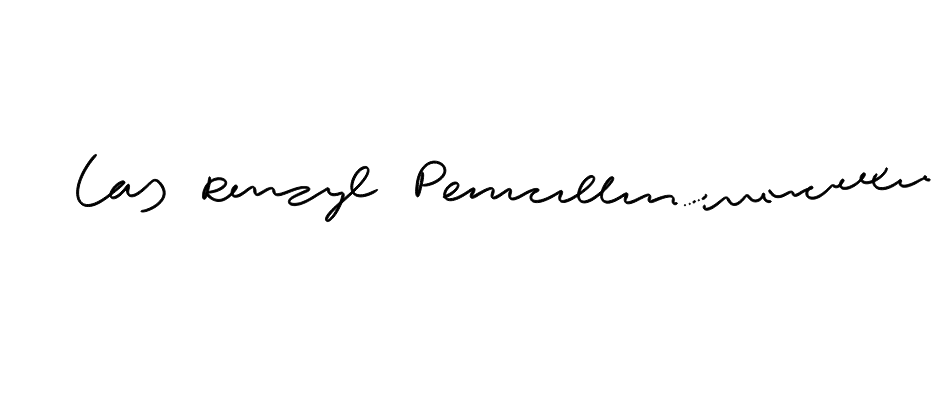

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Path to a sample image (replace with your actual path)
image_path = "/content/images/train/(a) Benzyl Penicillin-1.png"

# Load the image using OpenCV
image = cv2.imread(image_path)

# Check if the image was loaded successfully
if image is None:
    print("Error: Failed to load image")
    exit()

# Print the image dimensions
print("Image dimensions:", image.shape)  # Output: (height, width, channels)

# Display the image using cv2_imshow (for Colab)
cv2_imshow(image)

# Wait for a key press to close the window
cv2.waitKey(0)

# Close all OpenCV windows
cv2.destroyAllWindows()


In [ ]:
from PIL import Image
import os

def resize_images_in_folder(input_folder, output_folder, size):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for filename in os.listdir(input_folder):
        if filename.endswith(".png") or filename.endswith(".jpg"):
            img = Image.open(os.path.join(input_folder, filename))
            img = img.resize(size, Image.ANTIALIAS)
            img.save(os.path.join(output_folder, filename))  # Save image in new folder

# Use the function
resize_images_in_folder('/content/images/train', '/content/images/train_u', (400, 200))
resize_images_in_folder('/content/images/test', '/content/images/test_u', (400, 200))
resize_images_in_folder('/content/images/validate', '/content/images/validate_u', (400, 200))


<ipython-input-13-4e68347ea1a8>:11: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize(size, Image.ANTIALIAS)


Image dimensions: (200, 400, 3)


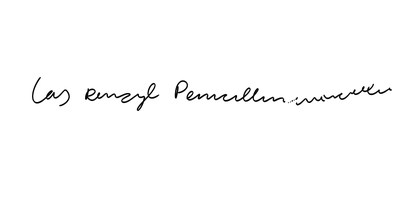

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Path to a sample image (replace with your actual path)
image_path = "/content/images/train_u/(a) Benzyl Penicillin-1.png"

# Load the image using OpenCV
image = cv2.imread(image_path)

# Check if the image was loaded successfully
if image is None:
    print("Error: Failed to load image")
    exit()

# Print the image dimensions
print("Image dimensions:", image.shape)  # Output: (height, width, channels)

# Display the image using cv2_imshow (for Colab)
cv2_imshow(image)

# Wait for a key press to close the window
cv2.waitKey(0)

# Close all OpenCV windows
cv2.destroyAllWindows()


In [ ]:
import os

def get_image_paths_and_labels(directory):
    img_paths = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".png"):  # Assuming all images are .png
            img_paths.append(os.path.join(directory, filename))
            label = filename.split(".")[0]  # Label is the filename without the extension
            labels.append(label)
    return img_paths, labels

base_path = "images"
train_dir = os.path.join(base_path, "train_u")
validation_dir = os.path.join(base_path, "validate_u")
test_dir = os.path.join(base_path, "test_u")

train_img_paths, train_labels = get_image_paths_and_labels(train_dir)
validation_img_paths, validation_labels = get_image_paths_and_labels(validation_dir)
test_img_paths, test_labels = get_image_paths_and_labels(test_dir)


In [ ]:
train_img_paths[0:10]

['images/train_u/Meprovamet-4.png',
 'images/train_u/Levo metharphan-3.png',
 'images/train_u/Dimercoprol-3.png',
 'images/train_u/Iopanoic Acid-4.png',
 'images/train_u/Morphine–N–oxide-1.png',
 'images/train_u/Azapentine-4.png',
 'images/train_u/Lead and it’s compound-4.png',
 'images/train_u/Phenyl Cinchoninic Acid-4.png',
 'images/train_u/Phytomenadione-2.png',
 'images/train_u/Pitutory Extract-2.png']

In [ ]:
test_img_paths[0:5]

['images/test_u/Bitaprodine-3.png',
 'images/test_u/Phytomenadione-3.png',
 'images/test_u/Streptomycin-5.png',
 'images/test_u/Tropa cocane-1.png',
 'images/test_u/Dapsone-4.png']

In [ ]:
validation_img_paths[0:5]

['images/validate_u/Zinc and it’s compound-2.png',
 'images/validate_u/Sulfasomizole-2.png',
 'images/validate_u/Sulphone diethyl Methene-2.png',
 'images/validate_u/Pyridostigmine-2.png',
 'images/validate_u/Benzitramide.png']

In [ ]:
train_labels[0:5]

['Meprovamet-4',
 'Levo metharphan-3',
 'Dimercoprol-3',
 'Iopanoic Acid-4',
 'Morphine–N–oxide-1']

In [ ]:
test_labels[0:5]

['Bitaprodine-3',
 'Phytomenadione-3',
 'Streptomycin-5',
 'Tropa cocane-1',
 'Dapsone-4']

In [ ]:
validation_labels[0:5]

['Zinc and it’s compound-2',
 'Sulfasomizole-2',
 'Sulphone diethyl Methene-2',
 'Pyridostigmine-2',
 'Benzitramide']

In [ ]:
#Extracting the labels from the information
train_labels_cleaned=[]
characters=set()
max_len=0


for label in train_labels:
  label=label.split(" ")[-1].strip()
  for char in label:
    characters.add(char)

    max_len=max(max_len,len(label))
  train_labels_cleaned.append(label)
print("Maximum length: ",max_len)
print("Vocab size; ",len(characters))

Maximum length:  24
Vocab size;  57


In [ ]:
print(len(train_labels_cleaned))

1593


In [ ]:
def cleaned_label(labels):
  cleaned_label=[]
  for label in labels:
    label=label.split(" ")[-1].strip()
    cleaned_label.append(label)
  return cleaned_label

validation_labels_cleaned=cleaned_label(validation_labels)
test_labels_cleaned=cleaned_label(test_labels)


In [ ]:
validation_labels_cleaned[:10]

['compound-2',
 'Sulfasomizole-2',
 'Methene-2',
 'Pyridostigmine-2',
 'Benzitramide',
 'precin-5',
 'compound-3',
 'Sulphate-2',
 'Alcolide-3',
 'Cantharidine']

In [ ]:
test_labels_cleaned[:10]

['Bitaprodine-3',
 'Phytomenadione-3',
 'Streptomycin-5',
 'cocane-1',
 'Dapsone-4',
 'Isocarboxazid-1',
 'sulphate-5',
 'Stilbocaptate-1',
 'Phethidene-2',
 'Narliverphenol-5']

Building character vocabulary

In [ ]:
AUTOTUNE=tf.data.AUTOTUNE
#mapping charecters to integers
char_to_num=StringLookup(vocabulary=list(characters),mask_token=None)
#mapping integers back to orginal charecters
num_to_char=StringLookup(vocabulary=char_to_num.get_vocabulary(),mask_token=None,invert=True)

Building character vocabulary

In [ ]:
#Resizing images without distortion
def distortion_free_resize(images,img_size):
  w,h=img_size
  image=tf.image.resize(images,size=(h,w),preserve_aspect_ratio=True)

  #checking if padding is required
  pad_height=h-tf.shape(image)[0]
  pad_width=w-tf.shape(image)[1]

  #for same amount of padding on both sides
  if pad_height % 2!=0:
    height=pad_height//2
    pad_height_top=height+1
    pad_height_bottom=height
  else:
    pad_height_top=pad_height_bottom=pad_height//2
  if pad_width % 2!=0:
    width=pad_width//2
    pad_width_left=width+1
    pad_width_right=width
  else:
    pad_width_left=pad_width_right=pad_width//2
  image =tf.pad(
      image,
      paddings=[
          [pad_height_top,pad_height_bottom],
          [pad_width_left, pad_width_right],
          [0,0],
      ],
  )
  image=tf.transpose(image, perm=[1,0,2])
  image=tf.image.flip_left_right(image)
  return image

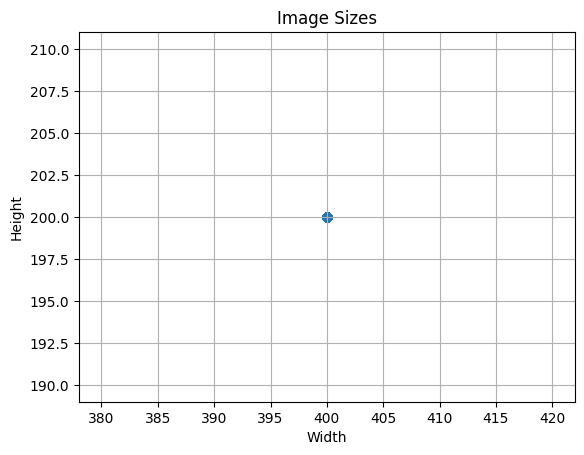

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Directory containing your images
image_dir = "/content/images/train_u"

# Lists to store the widths and heights
widths = []
heights = []

# Iterate over each image
for image_name in os.listdir(image_dir):
    # Open the image file
    image = Image.open(os.path.join(image_dir, image_name))
    # Get the size of the image
    width, height = image.size
    # Add the size to the lists
    widths.append(width)
    heights.append(height)

# Plot the sizes
plt.scatter(widths, heights)
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Image Sizes')
plt.grid(True)
plt.show()


In [ ]:
batch_size=16
padding_token=99
image_width=400
image_height=200
#noramixation of images from 0 to 1
def preprocess_image(image_path, img_size=(image_width,image_height)):
  image=tf.io.read_file(image_path)
  image=tf.io.decode_png(image,1)
  image=distortion_free_resize(image,img_size)
  image=tf.cast(image,tf.float32)/255.0
  return image

#vectorization of the label. convert them form characters to numrical value using mappping
def vectorize_label(label):
  label=char_to_num(tf.strings.unicode_split(label, input_encoding="UTF-8"))
  length=tf.shape(label)[0]
  pad_amount=max_len-length
  label =tf.pad(label,paddings=[[0,pad_amount]],constant_values=padding_token )
  return label
#return image path and label as arguments tyo ni dictionary
def process_images_labels(image_path,label):
  image=preprocess_image(image_path)
  label=vectorize_label(label)
  return {"image":image, "label":label}
# dataset return garxa
def prepare_dataset(image_paths, labels):
  dataset=tf.data.Dataset.from_tensor_slices((image_paths, labels)).map(
      process_images_labels,num_parallel_calls=AUTOTUNE
  )
  return dataset.batch(batch_size).cache().prefetch(AUTOTUNE)

In [ ]:
train_ds=prepare_dataset(train_img_paths, train_labels_cleaned)
validation_ds=prepare_dataset(validation_img_paths, validation_labels_cleaned)
test_ds=prepare_dataset(test_img_paths, test_labels_cleaned)


In [ ]:
train_img_paths[0:10]

['images/train_u/Meprovamet-4.png',
 'images/train_u/Levo metharphan-3.png',
 'images/train_u/Dimercoprol-3.png',
 'images/train_u/Iopanoic Acid-4.png',
 'images/train_u/Morphine–N–oxide-1.png',
 'images/train_u/Azapentine-4.png',
 'images/train_u/Lead and it’s compound-4.png',
 'images/train_u/Phenyl Cinchoninic Acid-4.png',
 'images/train_u/Phytomenadione-2.png',
 'images/train_u/Pitutory Extract-2.png']

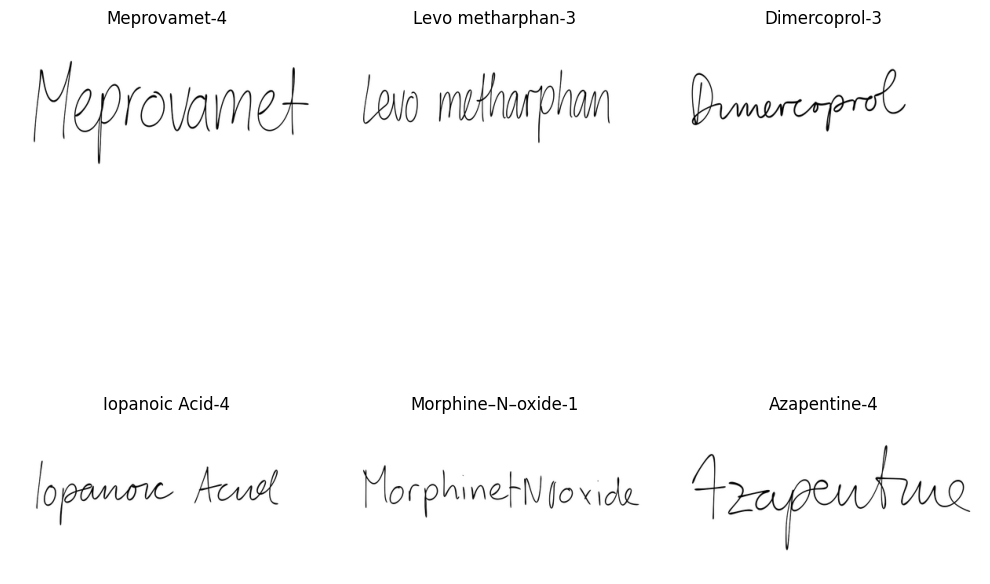

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def display_images_labels(image_paths, labels, num_rows, num_cols):
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10,10))
    axes = axes.ravel()
    for i in range(num_rows * num_cols):
        if i < len(image_paths):
            img = mpimg.imread(image_paths[i])
            axes[i].imshow(img)
            axes[i].set_title(labels[i])
            axes[i].axis('off')
        else:
            # Remove extra subplots
            fig.delaxes(axes[i])
    plt.tight_layout()
    plt.show()

# Use the function
display_images_labels(train_img_paths, train_labels, 2, 3)


In [ ]:
class CTCLayer(keras.layers.Layer):
  def __init__ (self, name=None):
    super(). __init__(name=name)
    self.loss_fn = keras.backend.ctc_batch_cost

  def call(self, y_true, y_pred):
    batch_len = tf.cast(tf.shape(y_true) [0], dtype="int64")
    input_length =tf.cast(tf.shape(y_pred) [1], dtype="int64")
    label_length =tf.cast(tf.shape(y_true) [1], dtype="int64")

    input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
    label_length = label_length *tf.ones(shape=(batch_len, 1), dtype="int64")
    loss = self.loss_fn(y_true, y_pred, input_length, label_length)
    self.add_loss(loss)

    # At test time, just return the computed predictions.
    return y_pred
def build_model():
  # Inputs to the model
  input_img = keras.Input(shape=(image_width, image_height, 1), name="image")
  labels = keras. layers. Input(name="label", shape=(None, ))


  # First conv block.
  x = keras.layers.Conv2D(128,(3, 3),activation="relu",kernel_initializer="he_normal",padding="same",name="Conv1",)(input_img)
  x = keras.layers.MaxPooling2D((2, 2), name="pool1")(x)

  # Second conv black.
  x = keras.layers.Conv2D(64,(3, 3),activation="relu",kernel_initializer="he_normal", padding="same",name="Conv3",)(x)
  x = keras.layers.MaxPooling2D((2, 2), name="pool3") (x)


  # We have used two max pool with pool size and strides 2.
  # Hence, downsampled feature maps are 4x smaller. The number of
  # filters in the last layer is 64. Reshape accordingly before
  # passing the output to the RNN part of the model.
  new_shape =((image_width // 4),(image_height // 4)*64)
  x = keras.layers.Reshape(target_shape=new_shape, name="reshape") (x)
  x = keras.layers.Dense(128, activation="relu", name="dense1") (x)
  x = keras.layers.Dropout(0.2) (x)


  # RNNS.
  x = keras.layers.Bidirectional(keras. layers.LSTM(128, return_sequences=True, dropout=0.25))(x)
  x = keras.layers.Bidirectional(keras. layers.LSTM(64, return_sequences=True, dropout=0.25))(x)
  x = keras.layers.Bidirectional(keras. layers.LSTM(32, return_sequences=True, dropout=0.25))(x)
  # +2 is to account for the two special tokens introduced by the CTC loss.
  x = keras.layers.Dense(len(char_to_num.get_vocabulary()) + 2, activation="softmax", name="dense2")(x)

  # Add CTC layer for calculating CTC loss at each step.
  output = CTCLayer(name="ctc_loss")(labels, x)

  # Define the model.
  model = keras.models.Model(inputs=[input_img, labels], outputs=output, name="handwriting_recognizer")

  # Optimizer.
  opt = keras.optimizers.Adam()
  # Compile the model and return.
  model.compile(optimizer=opt)
  return model

model=build_model()
model.summary()


Model: "handwriting_recognizer"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 image (InputLayer)          [(None, 400, 200, 1)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 400, 200, 128)        1280      ['image[0][0]']               
                                                                                                  
 pool1 (MaxPooling2D)        (None, 200, 100, 128)        0         ['Conv1[0][0]']               
                                                                                                  
 Conv3 (Conv2D)              (None, 200, 100, 64)         73792     ['pool1[0][0]']               
                                                                             

In [ ]:
#Evaluation metrics
#Edit distance is the most widely used metrics for evaluation of OCR
validation_images=[]
validation_labels=[]
for batch in validation_ds:
  validation_images.append(batch["image"])
  validation_labels.append(batch["label"])

In [ ]:
def calculate_edit_distance(labels, predictions):
  # Get a single batch and convert its labels to sparse tensors.
  saprse_labels = tf.cast(tf.sparse.from_dense(labels), dtype=tf.int64)

  # Make predictions and convert them to sparse tensors.
  input_len = np.ones(predictions.shape[0]) * predictions.shape[1]
  predictions_decoded = keras.backend.ctc_decode(
  predictions, input_length=input_len, greedy=True
  )[0][0][:, :max_len]
  sparse_predictions = tf.cast(
  tf.sparse.from_dense(predictions_decoded), dtype=tf.int64
  )
  # Compute individual edit distances and average them out.
  edit_distances = tf.edit_distance(
  sparse_predictions, saprse_labels, normalize=False
  )
  return tf.reduce_mean(edit_distances)

class EditDistanceCallback(keras.callbacks.Callback):
    def __init__ (self, pred_model):
        super().__init__()
        self.prediction_model = pred_model
    def on_epoch_end(self,epoch,logs=None):  # Correct function name
        edit_distances=[]

        for i in range(len(validation_images)):
            labels=validation_labels[i]  # Corrected from 'labels=validation_labels[1]'
            predictions=self.prediction_model.predict(validation_images[i])
            edit_distances.append(calculate_edit_distance(labels,predictions).numpy())
        print(f"Mean edit distances for epoch {epoch+1}:{np.mean(edit_distances):.4f}")


In [ ]:
epochs=35
model=build_model()
prediction_model=keras.models.Model(
    model.get_layer(name="image").input,model.get_layer(name="dense2").output
)
edit_distance_callback=EditDistanceCallback(prediction_model)
#Train the model
history=model.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=epochs,
    callbacks=[edit_distance_callback],
)

Epoch 1/35
1/1 [==============================] - 0s 37ms/step
Mean edit distances for epoch 1:24.0000
100/100 [==============================] - 36s 213ms/step - loss: 59.1977 - val_loss: 42.3874
Epoch 2/35
1/1 [==============================] - 0s 31ms/step
Mean edit distances for epoch 2:24.0000
100/100 [==============================] - 14s 138ms/step - loss: 38.7404 - val_loss: 40.0458
Epoch 3/35
1/1 [==============================] - 0s 31ms/step
Mean edit distances for epoch 3:24.0000
100/100 [==============================] - 14s 137ms/step - loss: 35.5265 - val_loss: 36.9967
Epoch 4/35
1/1 [==============================] - 0s 35ms/step
Mean edit distances for epoch 4:23.8448
100/100 [==============================] - 14s 137ms/step - loss: 33.2533 - val_loss: 35.0276
Epoch 5/35
1/1 [==============================] - 0s 29ms/step
Mean edit distances for epoch 5:23.8448
100/100 [==============================] - 14s 137ms/step - loss: 32.1759 - val_loss: 34.1701
Epoch 6/35
1/1 

In [ ]:
model.save('model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 107ms/step


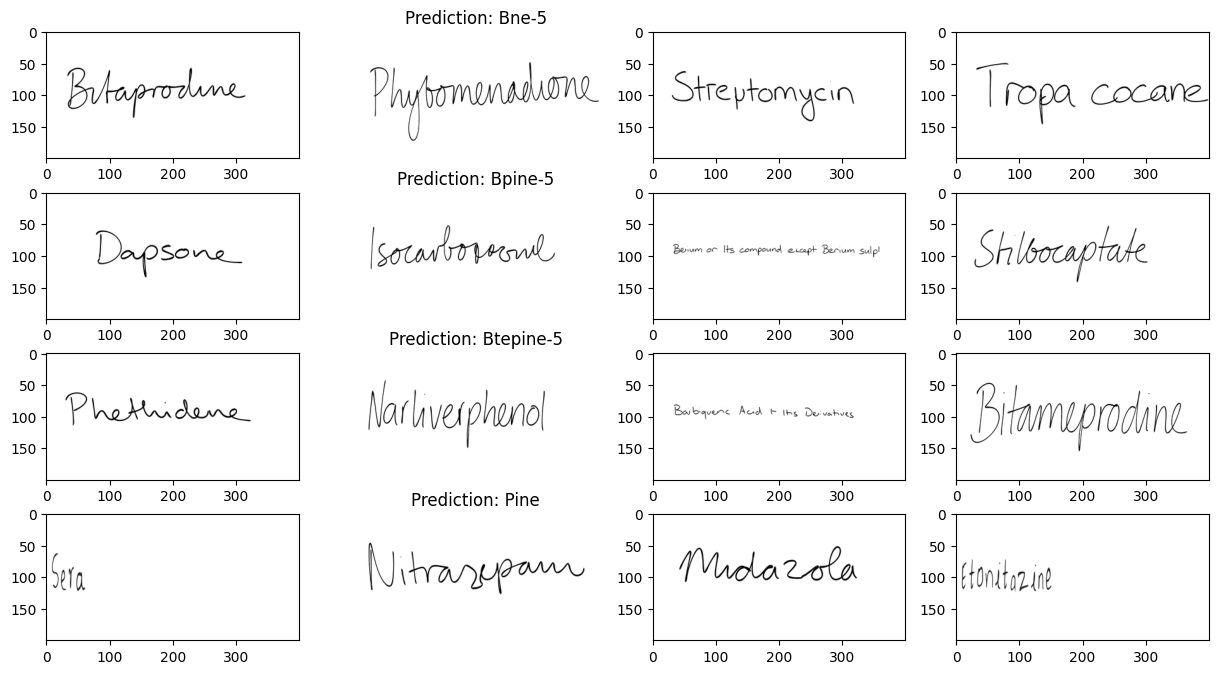

In [ ]:
# A utility function to decode the output of the network.
def decode_batch_predictions(pred):
  input_len = np.ones(pred.shape[0]) * pred.shape[1]
  # Use greedy search. For complex tasks, you can use beam search.
  results = keras.backend.ctc_decode(pred, input_length=input_len, greedy=True) [0][0][
  :, :max_len
  ]
  # Iterate over the results and get back the text.
  output_text = []
  for res in results:
    res = tf.gather(res, tf.where(tf.math.not_equal(res, -1)))
    res = tf.strings.reduce_join(num_to_char(res)).numpy().decode("utf-8")
    output_text.append(res)
  return output_text
# Let's check results on some test samples.
for batch in test_ds.take(1):
  batch_images = batch["image"]
  _, ax = plt.subplots(4, 4, figsize=(15, 8))

  preds = prediction_model.predict(batch_images)
  pred_texts = decode_batch_predictions(preds)

  for i in range(16):
    img = batch_images[i]
    img = tf.image.flip_left_right(img)
    img = tf.transpose(img, perm=[1, 0, 2])
    img = (img * 255.0).numpy().clip(0, 255).astype(np.uint8)
    img = img[:, :, 0]

    title = f"Prediction: {pred_texts[i]}"
    ax[i // 4, i % 4].imshow(img, cmap="gray")
    ax[i // 4, 1 % 4].set_title(title)
    ax[i // 4, 1 % 4].axis("off")

plt.show()